# ACI IoT Network Traffic

## Get dataset

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
!kaggle datasets download -d fredericxiong/google-analytics-capstone-project

Dataset URL: https://www.kaggle.com/datasets/fredericxiong/google-analytics-capstone-project
License(s): MIT
  0% 0.00/8.43k [00:00<?, ?B/s]
100% 8.43k/8.43k [00:00<00:00, 10.6MB/s]


In [ ]:
!unzip -q /content/google-analytics-capstone-project.zip -d /content/

In [ ]:
df = pd.read_csv('GCapstone.csv')
pd.set_option('display.max_columns', None)
df

,Interest in Large Language Model by Region throughout 2023,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Sourced from Google Trends Searches,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Data is created by cumulating interest throughout periods of a month,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"If data includes numbers from other months, wi...",NaN
1,Month:,January,February,March,April,May,June,July,August,September,October,November,December
2,Regions:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WorldWide,0,0,0,27,51,158,149,260,312,280,303,386
4,China,0,7,0,46,35,73,161,303,214,217,277,234
5,Singapore,6,0,5,33,69,120,218,205,324,237,320,328
6,South Korea,3,0,0,17,25,30,153,163,252,238,313,307
7,Japan,1,0,1,10,44,123,239,242,338,326,351,366
8,United States,0,0,0,28,65,181,193,242,310,279,294,369
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna()
df

,Interest in Large Language Model by Region throughout 2023,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Sourced from Google Trends Searches,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Data is created by cumulating interest throughout periods of a month,Unnamed: 12
1,Month:,January,February,March,April,May,June,July,August,September,October,November,December
3,WorldWide,0,0,0,27,51,158,149,260,312,280,303,386
4,China,0,7,0,46,35,73,161,303,214,217,277,234
5,Singapore,6,0,5,33,69,120,218,205,324,237,320,328
6,South Korea,3,0,0,17,25,30,153,163,252,238,313,307
7,Japan,1,0,1,10,44,123,239,242,338,326,351,366
8,United States,0,0,0,28,65,181,193,242,310,279,294,369


## EDA

In [ ]:
df.describe()

,Interest in Large Language Model by Region throughout 2023,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Sourced from Google Trends Searches,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Data is created by cumulating interest throughout periods of a month,Unnamed: 12
count,7,7,7,7,7,7,7,7,7,7,7,7,7
unique,7,5,3,4,7,7,7,7,6,7,7,7,7
top,Month:,0,0,0,April,May,June,July,242,September,October,November,December
freq,1,3,5,4,1,1,1,1,2,1,1,1,1


In [ ]:
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'WorldWide': [0, 0, 0, 27, 51, 158, 149, 260, 312, 280, 303, 386],
    'China': [0, 7, 0, 46, 35, 73, 161, 303, 214, 217, 277, 234],
    'Singapore': [6, 0, 5, 33, 69, 120, 218, 205, 324, 237, 320, 328],
    'South Korea': [3, 0, 0, 17, 25, 30, 153, 163, 252, 238, 313, 307],
    'Japan': [1, 0, 1, 10, 44, 123, 239, 242, 338, 326, 351, 366],
    'United States': [0, 0, 0, 28, 65, 181, 193, 242, 310, 279, 294, 369]
}
df = pd.DataFrame(data)
df

,Month,WorldWide,China,Singapore,South Korea,Japan,United States
0,January,0,0,6,3,1,0
1,February,0,7,0,0,0,0
2,March,0,0,5,0,1,0
3,April,27,46,33,17,10,28
4,May,51,35,69,25,44,65
5,June,158,73,120,30,123,181
6,July,149,161,218,153,239,193
7,August,260,303,205,163,242,242
8,September,312,214,324,252,338,310
9,October,280,217,237,238,326,279


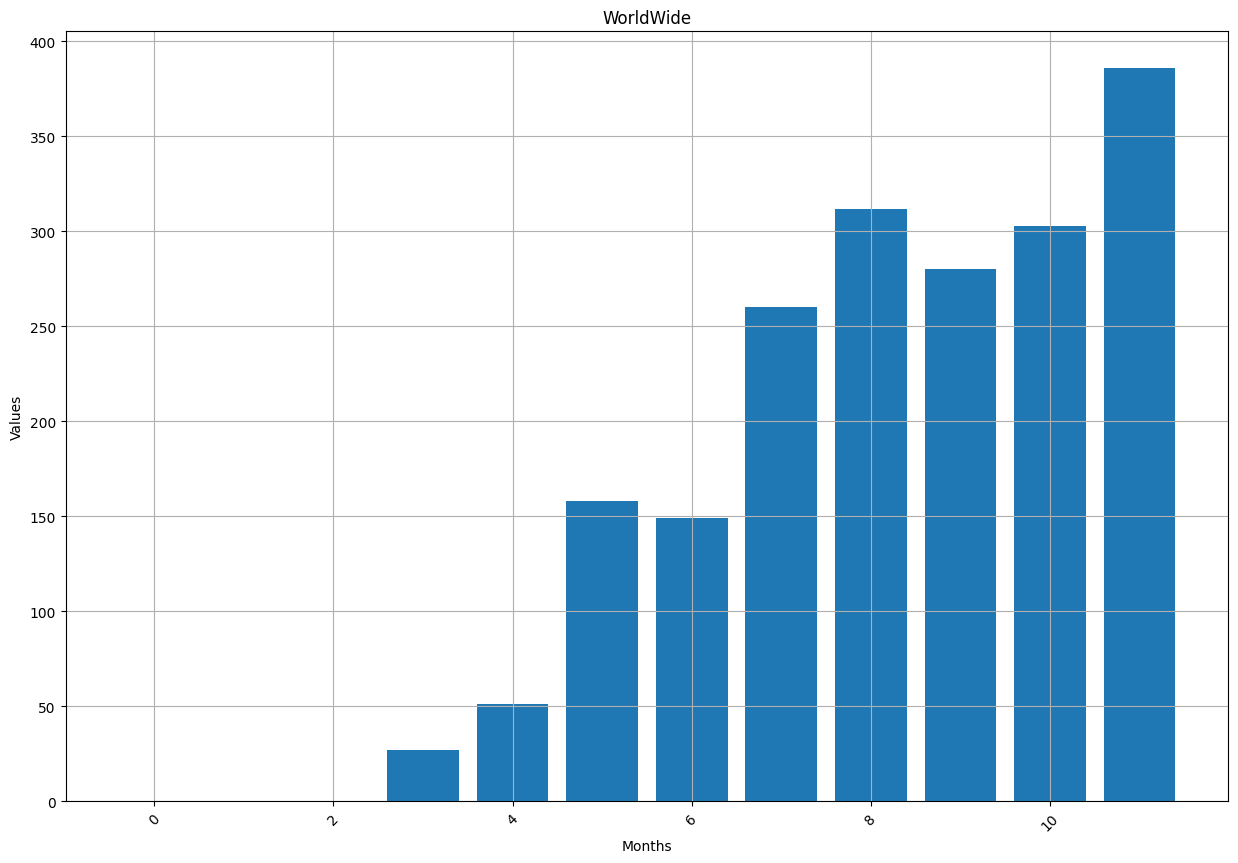

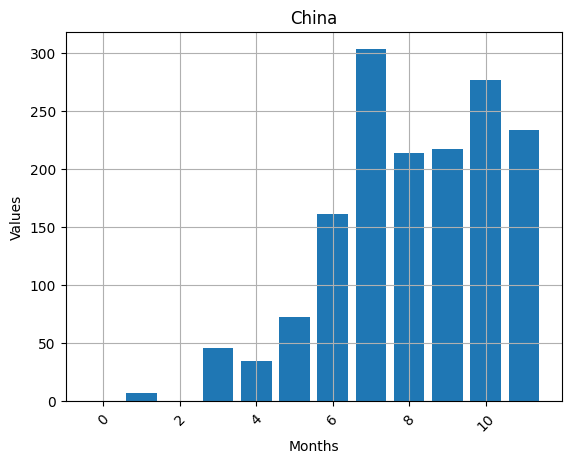

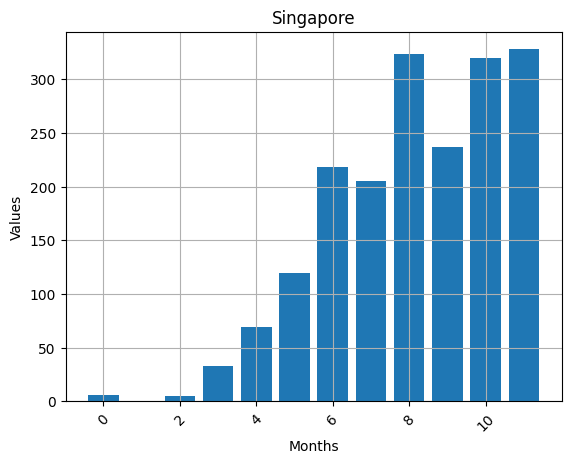

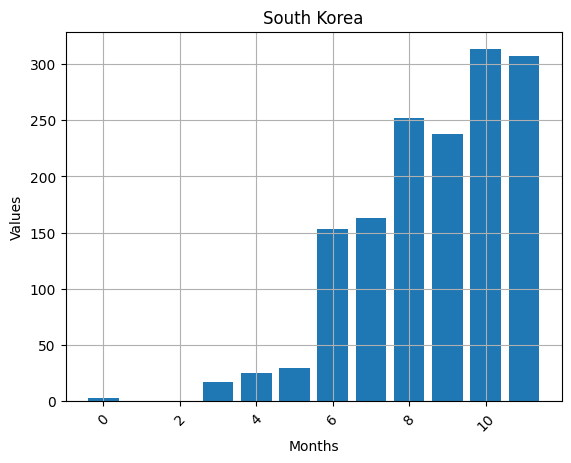

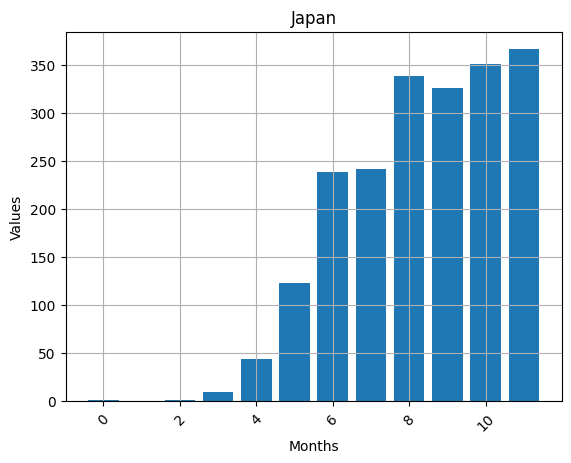

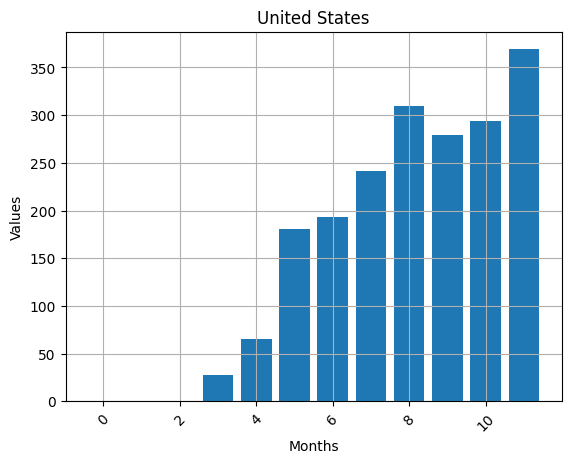

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, country in enumerate(['WorldWide', 'China', 'Singapore', 'South Korea', 'Japan', 'United States'], start=1):
    plt.bar(df.index, df[country])
    plt.title(country)
    plt.xlabel('Months')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

## Data Preprocessing

In [ ]:
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month

In [ ]:
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

## Model Training

### Model 1: SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def fit_forecast_sarima(data, country):
    model = SARIMAX(data[country], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    forecast_steps = 12
    forecast = results.get_forecast(steps=forecast_steps)
    return forecast.predicted_mean, results

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


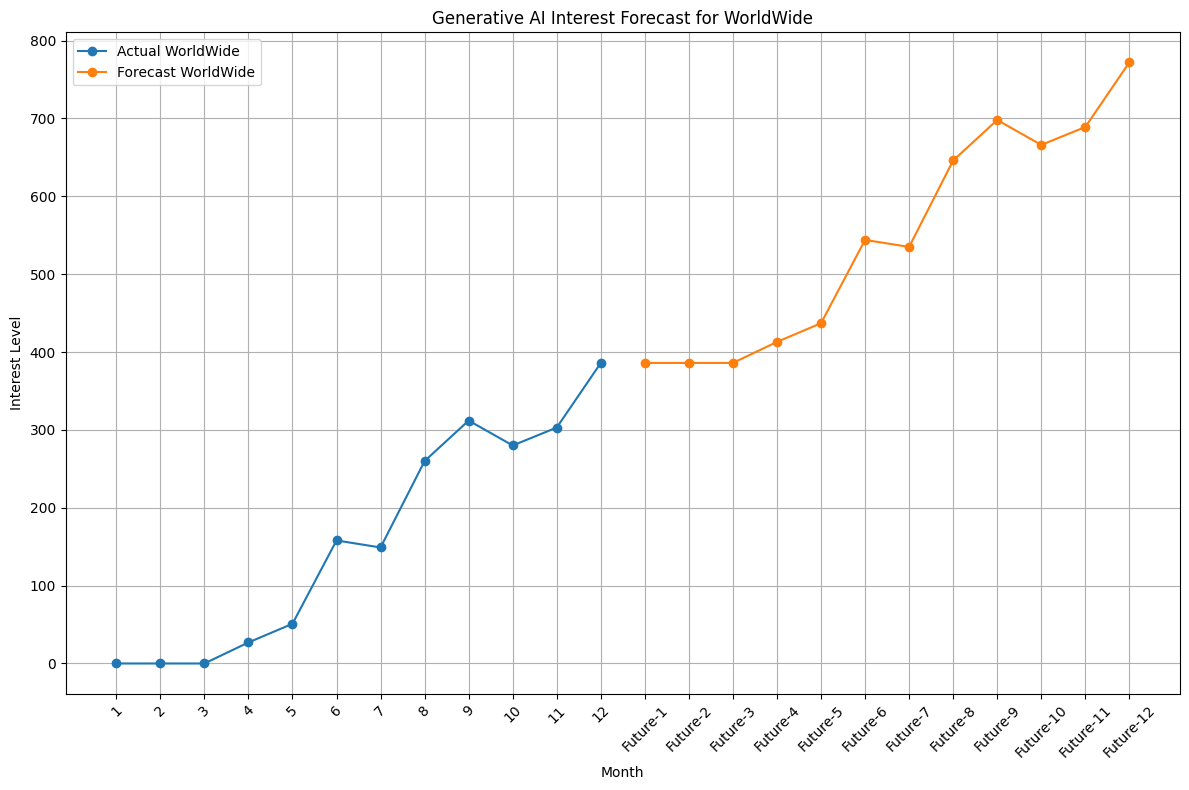

Mean Squared Error for WorldWide: 3025.1666666666665



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


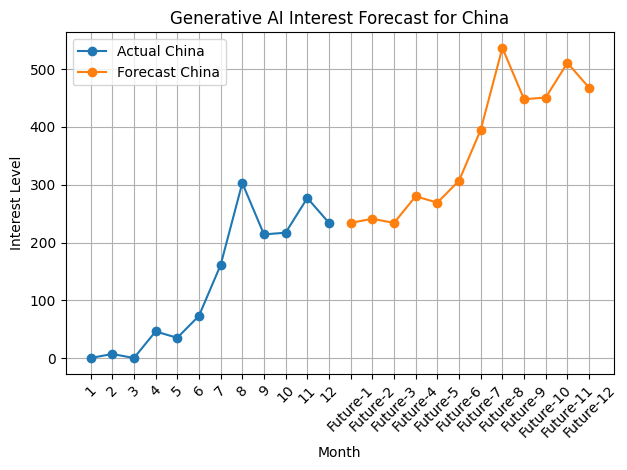

Mean Squared Error for China: 3755.5



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


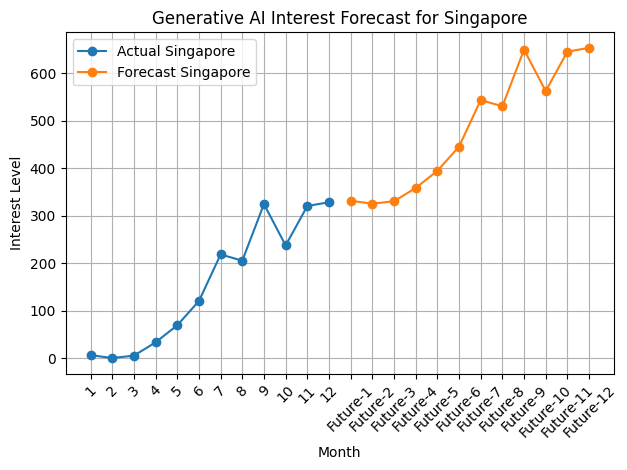

Mean Squared Error for Singapore: 3602.8333333333335



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


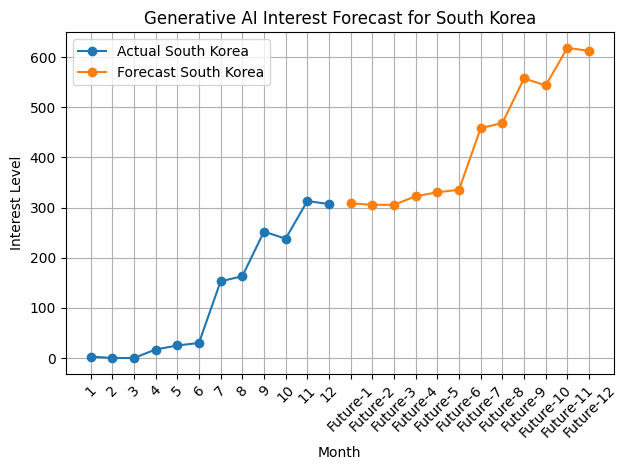

Mean Squared Error for South Korea: 2450.25



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


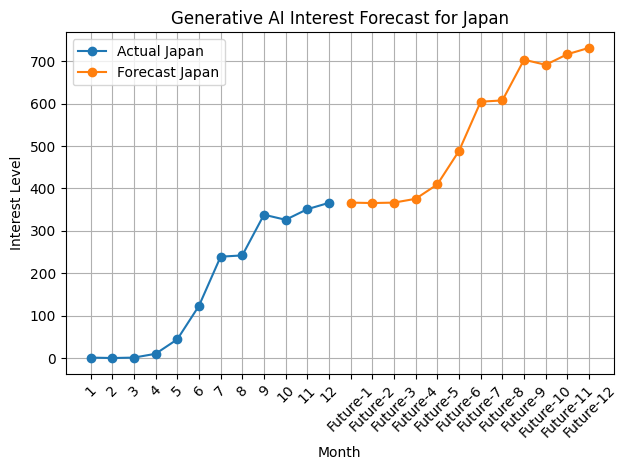

Mean Squared Error for Japan: 2596.333333333333



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


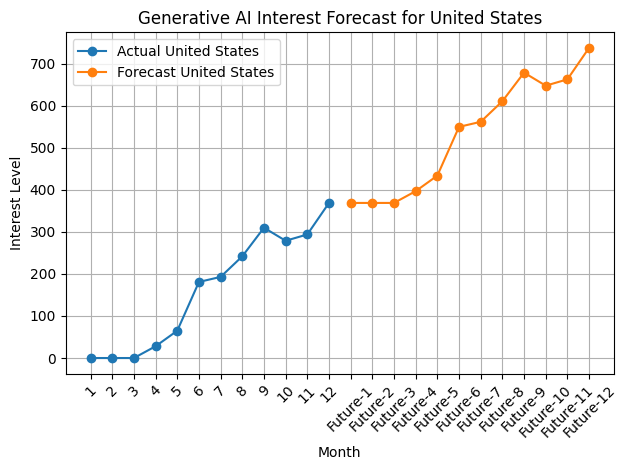

Mean Squared Error for United States: 2465.75



In [ ]:
plt.figure(figsize=(12, 8))

for country in ['WorldWide', 'China', 'Singapore', 'South Korea', 'Japan', 'United States']:
    forecast, model = fit_forecast_sarima(df, country)
    mse = mean_squared_error(df[country], model.fittedvalues)

    plt.plot(df['Month'], df[country], marker='o', linestyle='-', label=f'Actual {country}')
    plt.plot(np.arange(13, 13 + len(forecast)), forecast, marker='o', linestyle='-', label=f'Forecast {country}')
    plt.xlabel('Month')
    plt.ylabel('Interest Level')
    plt.title(f'Generative AI Interest Forecast for {country}')
    plt.xticks(np.arange(1, 13 + len(forecast)), list(df['Month']) + [f'Future-{i}' for i in range(1, len(forecast) + 1)], rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f'Mean Squared Error for {country}: {mse}\n')

### Model 2: ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

def fit_forecast_arima(data, country):
    model = ARIMA(data[country], order=(1, 1, 1))  # Example ARIMA order
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=12)  # Forecast next 12 months
    return forecast, fitted_model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


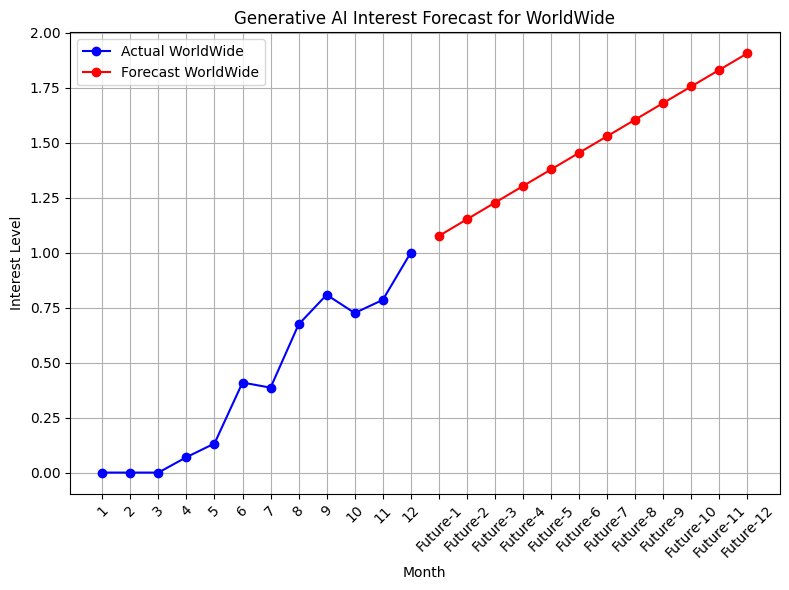

Mean Squared Error for WorldWide: 0.015828689092572328



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


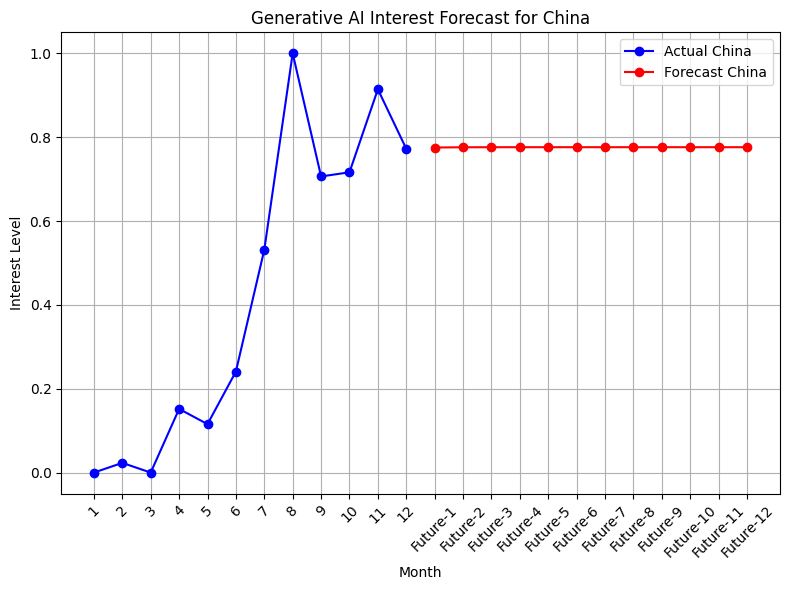

Mean Squared Error for China: 0.04085869420658544



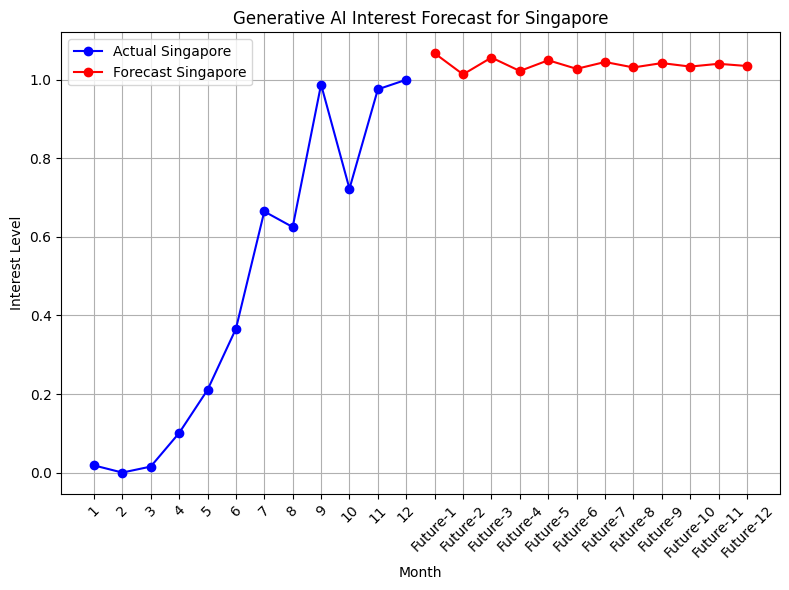

Mean Squared Error for Singapore: 0.027493275727715802



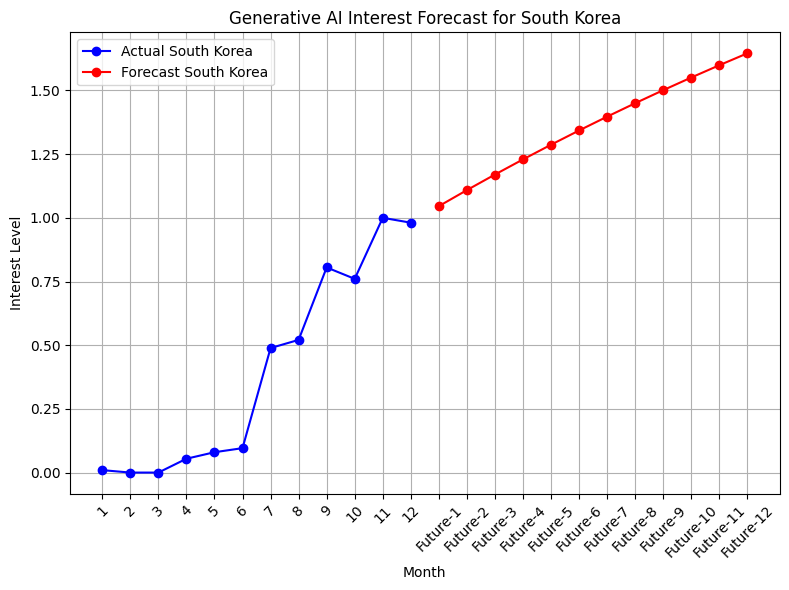

Mean Squared Error for South Korea: 0.021760454613335933



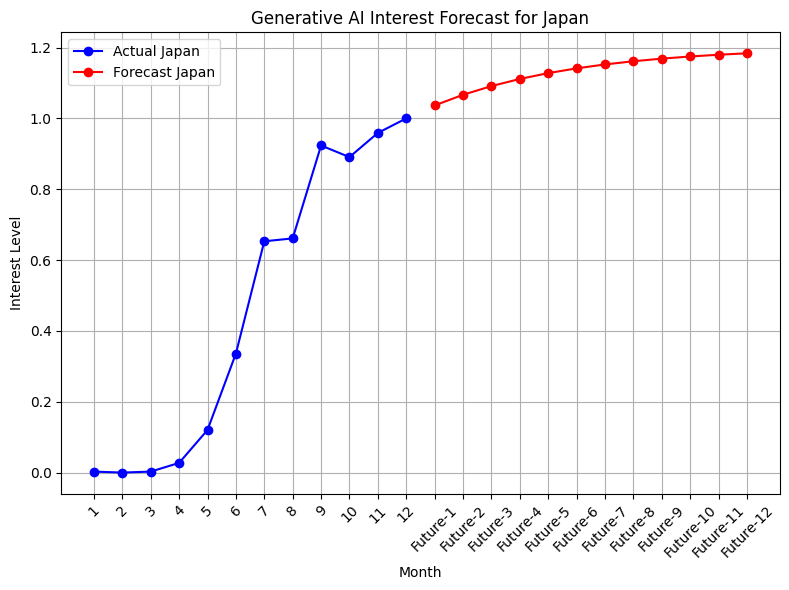

Mean Squared Error for Japan: 0.014365456228811855



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


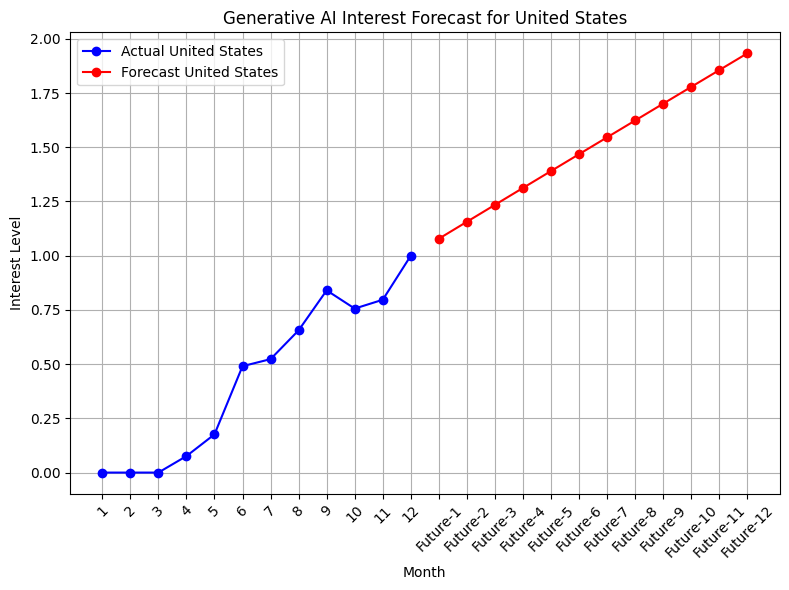

Mean Squared Error for United States: 0.01330593869417339



In [ ]:
for country in ['WorldWide', 'China', 'Singapore', 'South Korea', 'Japan', 'United States']:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed

    forecast, model = fit_forecast_arima(df, country)
    mse = mean_squared_error(df[country], model.fittedvalues)

    plt.plot(df['Month'], df[country], marker='o', linestyle='-', color='b', label=f'Actual {country}')
    plt.plot(np.arange(13, 13 + len(forecast)), forecast, marker='o', linestyle='-', color='r', label=f'Forecast {country}')
    plt.xlabel('Month')
    plt.ylabel('Interest Level')
    plt.title(f'Generative AI Interest Forecast for {country}')
    plt.xticks(np.arange(1, 13 + len(forecast)), list(df['Month']) + [f'Future-{i}' for i in range(1, len(forecast) + 1)], rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f'Mean Squared Error for {country}: {mse}\n')

### Model 3: Linear Regression


In [ ]:
models = {}
for col in df.columns[1:]:
    model = LinearRegression()
    X_train = train_df[['Month']]
    y_train = train_df[col]
    model.fit(X_train, y_train)
    models[col] = model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

Mean Squared Error for WorldWide: 0.15681863010490982


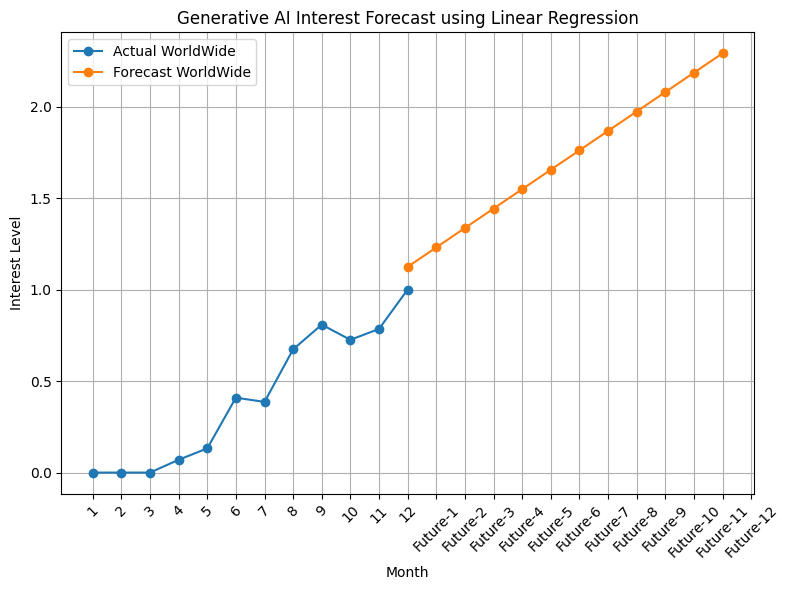

Mean Squared Error for China: 0.3062392599423736


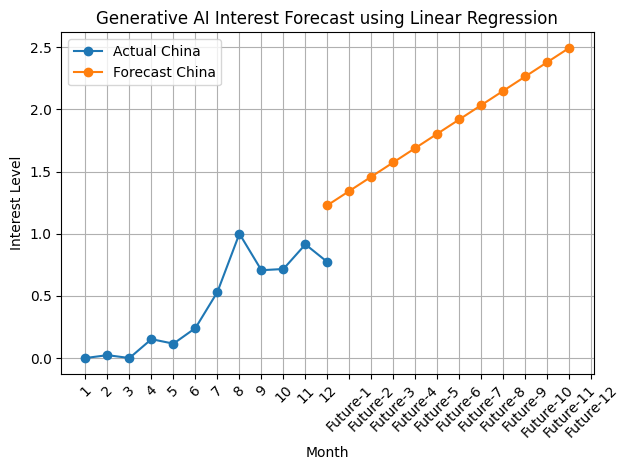

Mean Squared Error for Singapore: 0.2841501742422576


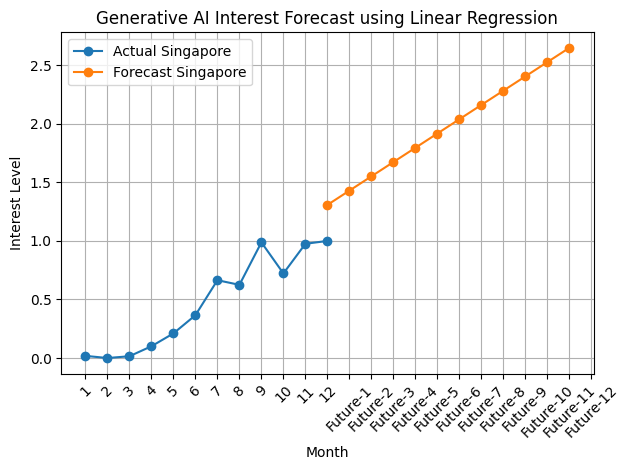

Mean Squared Error for South Korea: 0.03591526621736859


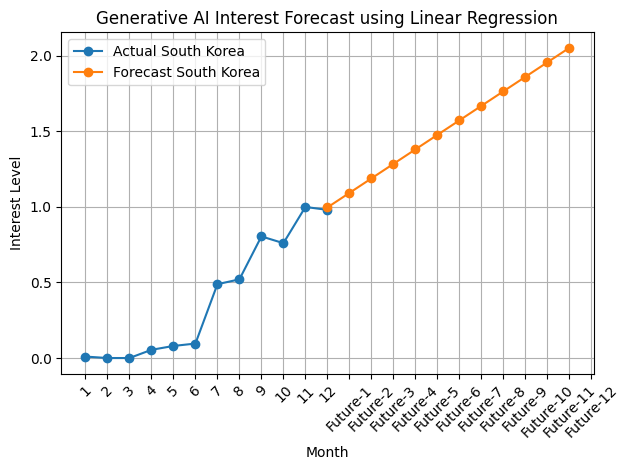

Mean Squared Error for Japan: 0.20054474654290413


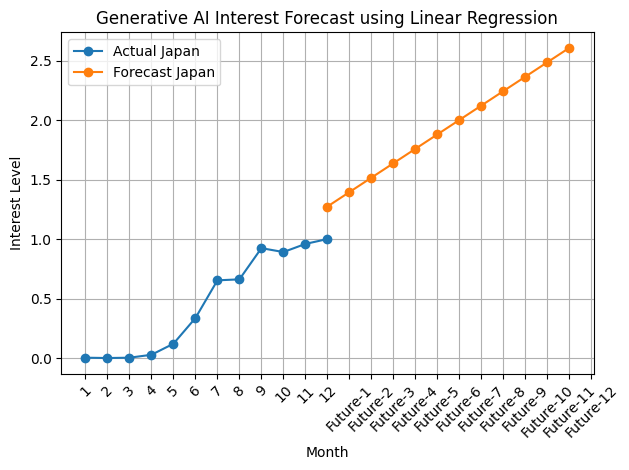

Mean Squared Error for United States: 0.22636672921063616


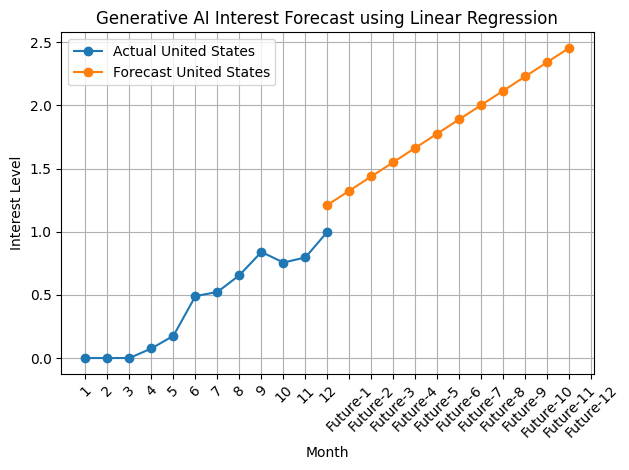

In [ ]:
forecast_steps = 12
forecasts = {}
for col in df.columns[1:]:
    model = models[col]
    X_forecast = np.arange(len(df) + 1, len(df) + 1 + forecast_steps).reshape(-1, 1)  # Forecast next 12 months
    forecast = model.predict(X_forecast)
    forecasts[col] = forecast

plt.figure(figsize=(8, 6))

for col in df.columns[1:]:
    y_true = test_df[col].values  # Ensure y_true is an array of values
    y_pred = forecasts[col][:len(test_df)]  # Trim forecasted values to match the length of y_true
    mse[col] = mean_squared_error(y_true, y_pred)
    print(f'Mean Squared Error for {col}: {mse[col]}')
    plt.plot(df['Month'], df[col], marker='o', linestyle='-', label=f'Actual {col}')
    plt.plot(np.arange(len(df), len(df) + forecast_steps), forecasts[col], marker='o', linestyle='-', label=f'Forecast {col}')

    plt.xlabel('Month')
    plt.ylabel('Interest Level')
    plt.title('Generative AI Interest Forecast using Linear Regression')
    plt.xticks(np.arange(1, len(df) + forecast_steps + 1), list(df['Month']) + [f'Future-{i}' for i in range(1, forecast_steps + 1)], rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Model 4: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

models = {}
for col in df.columns[1:]:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    X_train = train_df[['Month']]
    y_train = train_df[col]
    model.fit(X_train, y_train)
    models[col] = model

forecast_steps = 12
forecasts = {}
for col in df.columns[1:]:
    model = models[col]
    X_forecast = np.arange(len(df) + 1, len(df) + 1 + forecast_steps).reshape(-1, 1)
    forecast = model.predict(X_forecast)
    forecasts[col] = forecast


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

Mean Squared Error for WorldWide: 0.02206226453506559


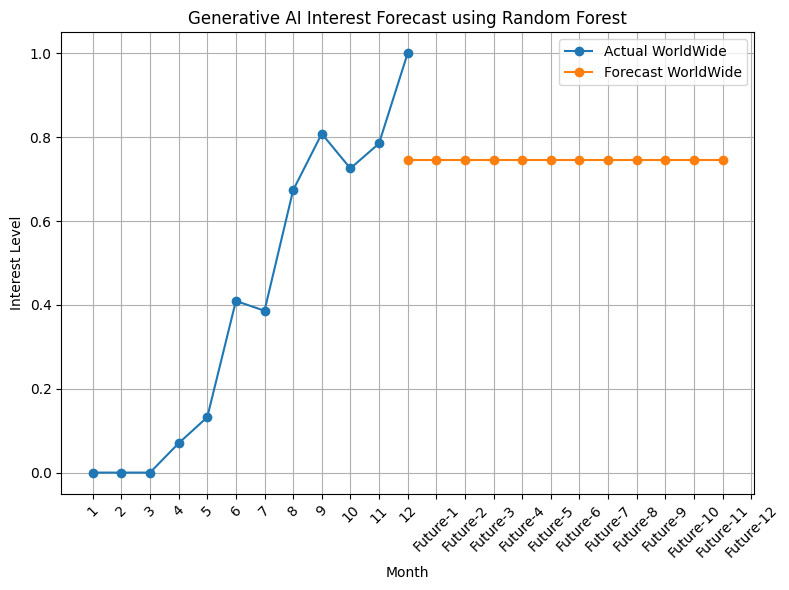

Mean Squared Error for China: 0.010949907961093026


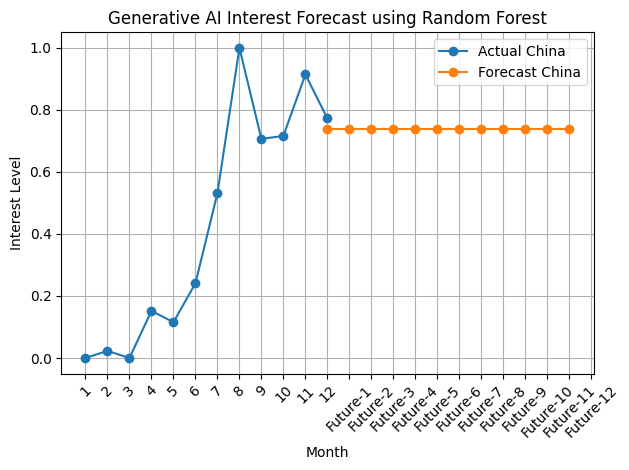

Mean Squared Error for Singapore: 0.01587627404322826


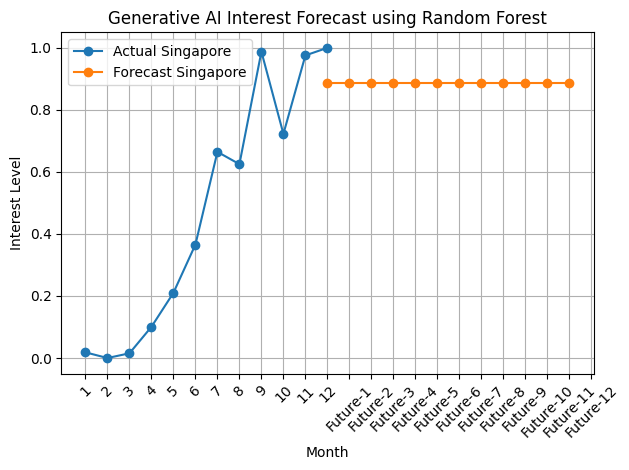

Mean Squared Error for South Korea: 0.05028868417560669


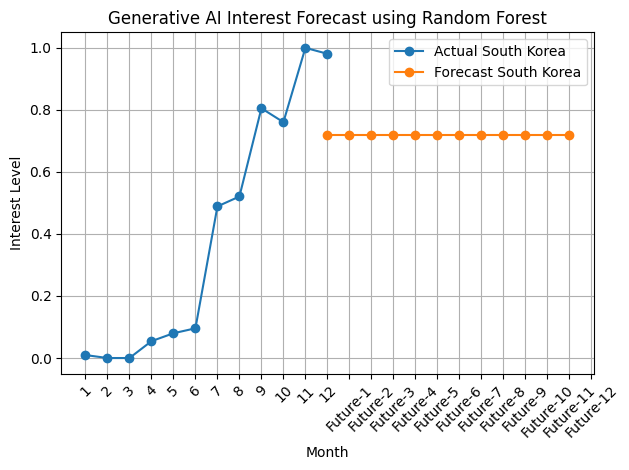

Mean Squared Error for Japan: 0.012912300307563851


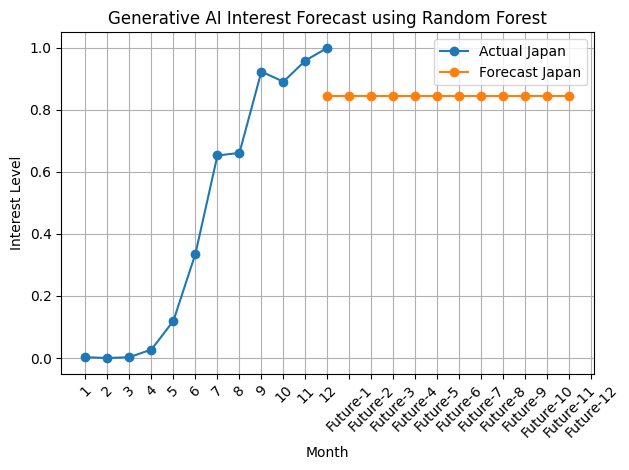

Mean Squared Error for United States: 0.016741505276841467


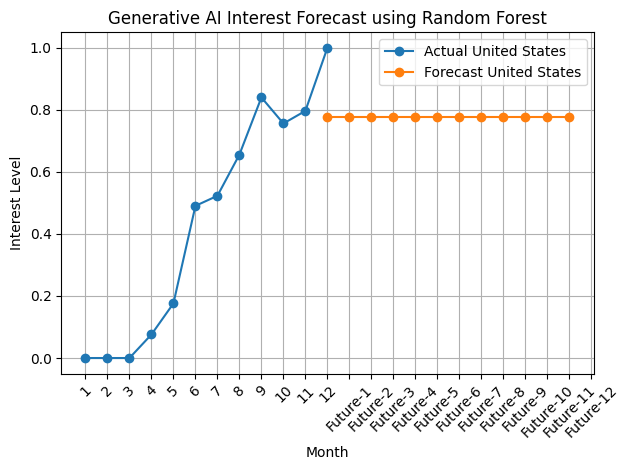

In [ ]:
plt.figure(figsize=(8, 6))

for col in df.columns[1:]:
    y_true = test_df[col].values  # Ensure y_true is an array of values
    y_pred = forecasts[col][:len(test_df)]  # Trim forecasted values to match the length of y_true
    mse[col] = mean_squared_error(y_true, y_pred)
    print(f'Mean Squared Error for {col}: {mse[col]}')
    plt.plot(df['Month'], df[col], marker='o', linestyle='-', label=f'Actual {col}')
    plt.plot(np.arange(len(df), len(df) + forecast_steps), forecasts[col], marker='o', linestyle='-', label=f'Forecast {col}')

    plt.xlabel('Month')
    plt.ylabel('Interest Level')
    plt.title('Generative AI Interest Forecast using Random Forest')
    plt.xticks(np.arange(1, len(df) + forecast_steps + 1), list(df['Month']) + [f'Future-{i}' for i in range(1, forecast_steps + 1)], rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Model 5: LSTM


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 3
X, y = create_sequences(scaled_data, SEQ_LENGTH)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, X.shape[2])))
model.add(LSTM(50))
model.add(Dense(X.shape[2]))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

y_pred = model.predict(X_test)
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.2274 - val_loss: 0.5929
Epoch 2/100
1/1 [==============================] - 0s 44ms/step - loss: 0.2218 - val_loss: 0.5813
Epoch 3/100
1/1 [==============================] - 0s 52ms/step - loss: 0.2163 - val_loss: 0.5697
Epoch 4/100
1/1 [==============================] - 0s 62ms/step - loss: 0.2109 - val_loss: 0.5581
Epoch 5/100
1/1 [==============================] - 0s 45ms/step - loss: 0.2055 - val_loss: 0.5463
Epoch 6/100
1/1 [==============================] - 0s 45ms/step - loss: 0.2002 - val_loss: 0.5342
Epoch 7/100
1/1 [==============================] - 0s 44ms/step - loss: 0.1947 - val_loss: 0.5217
Epoch 8/100
1/1 [==============================] - 0s 50ms/step - loss: 0.1892 - val_loss: 0.5086
Epoch 9/100
1/1 [==============================] - 0s 62ms/step - loss: 0.1836 - val_loss: 0.4950
Epoch 10/100
1/1 [==============================] - 0s 60ms/step - loss: 0.1778 - val_loss: 0.4806
Epoch 11/100
1/1 [===

MSE for Month: 5.264296866118915


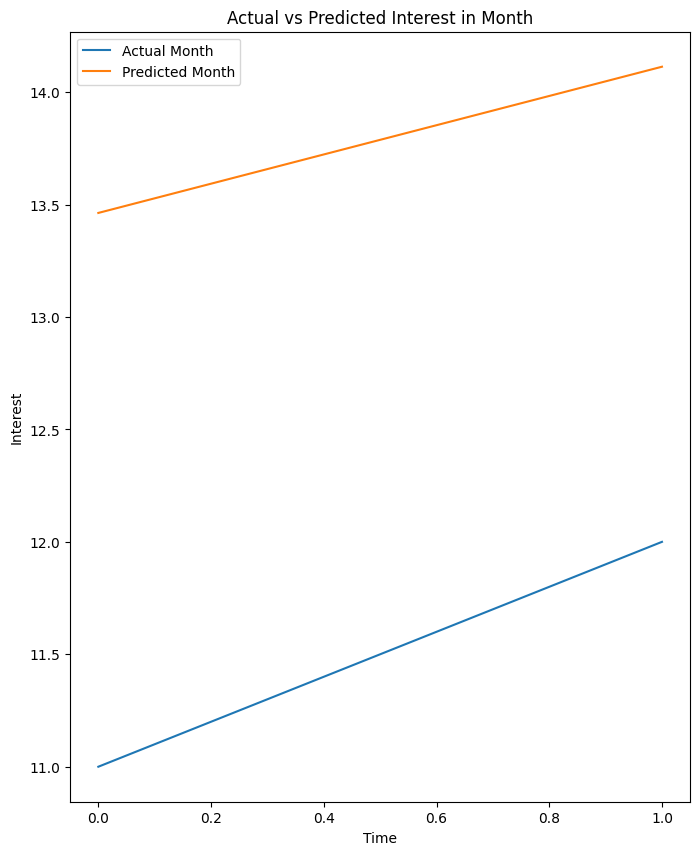

MSE for WorldWide: 27538.882124875207


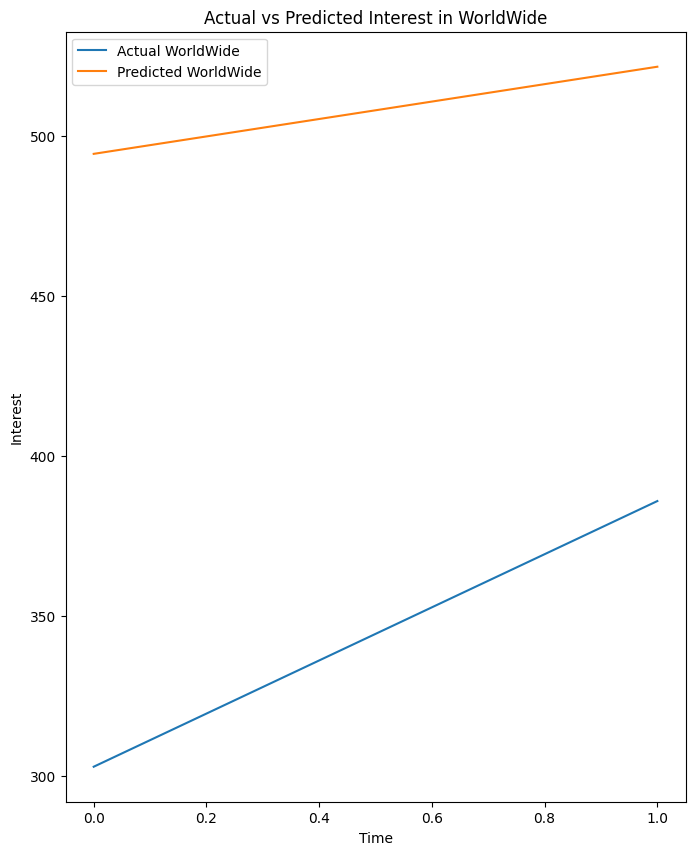

MSE for China: 158708.5299773831


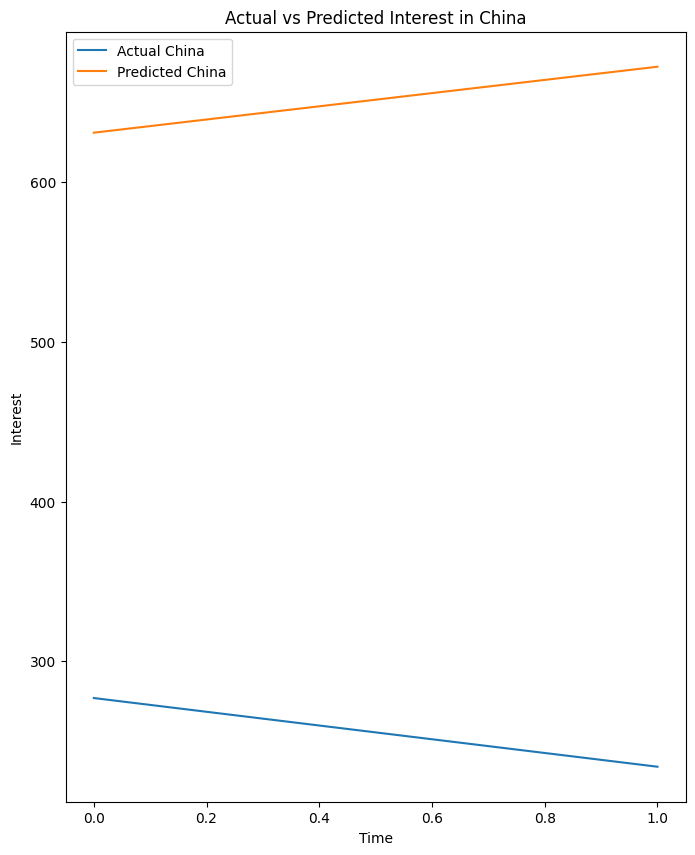

MSE for Singapore: 18094.103039224632


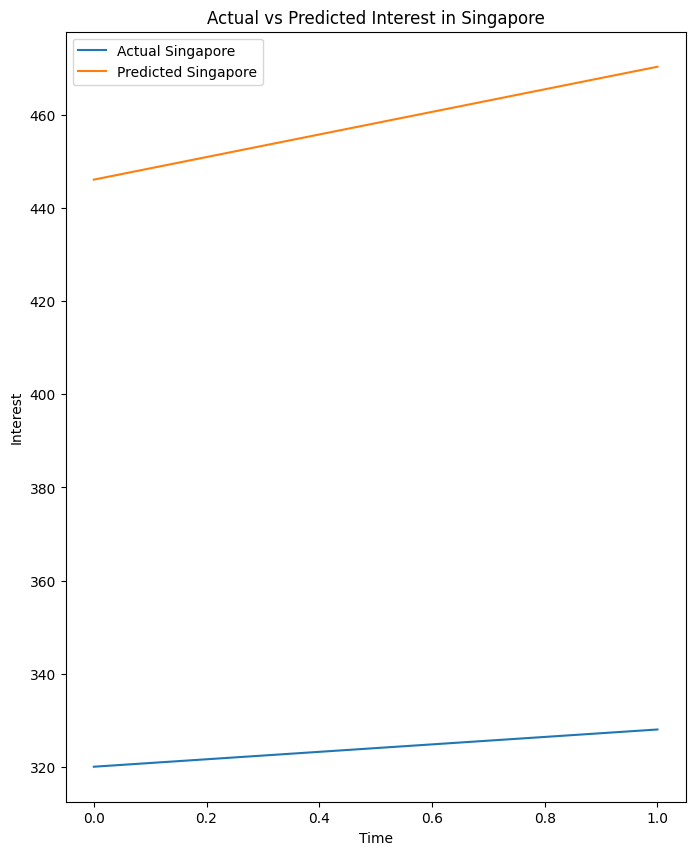

MSE for South Korea: 4372.856429966632


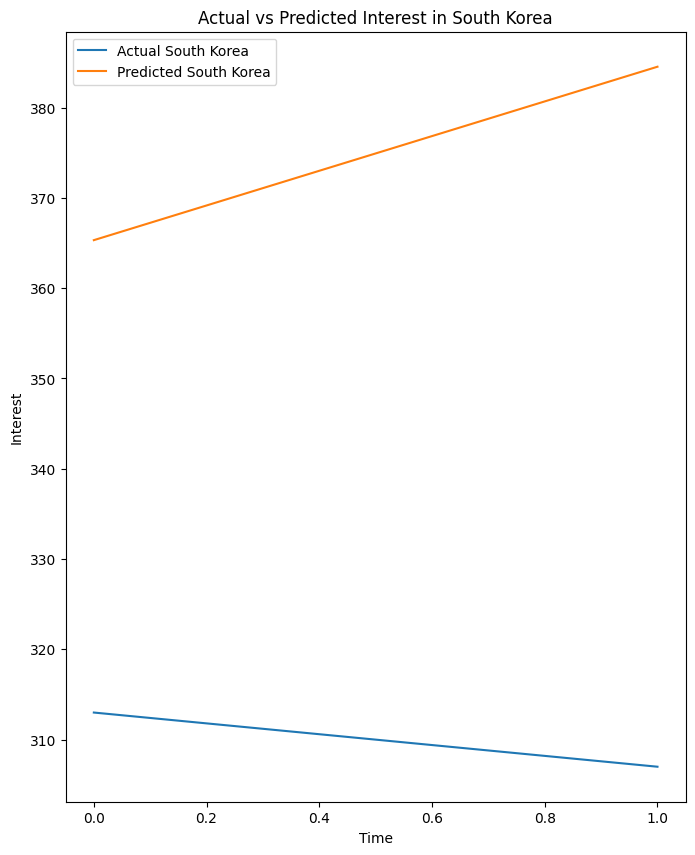

MSE for Japan: 37834.86818368733


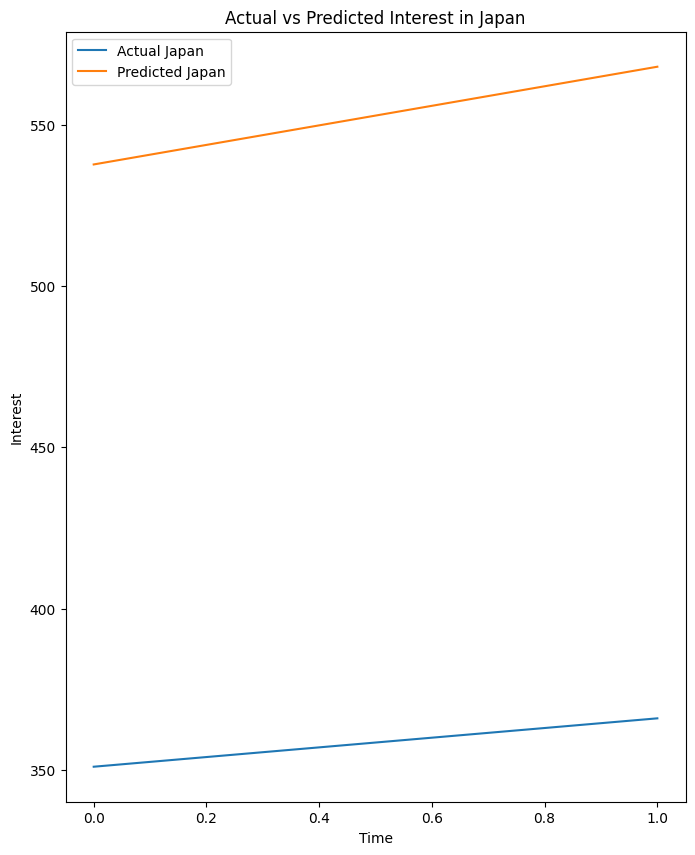

MSE for United States: 15787.090447925497


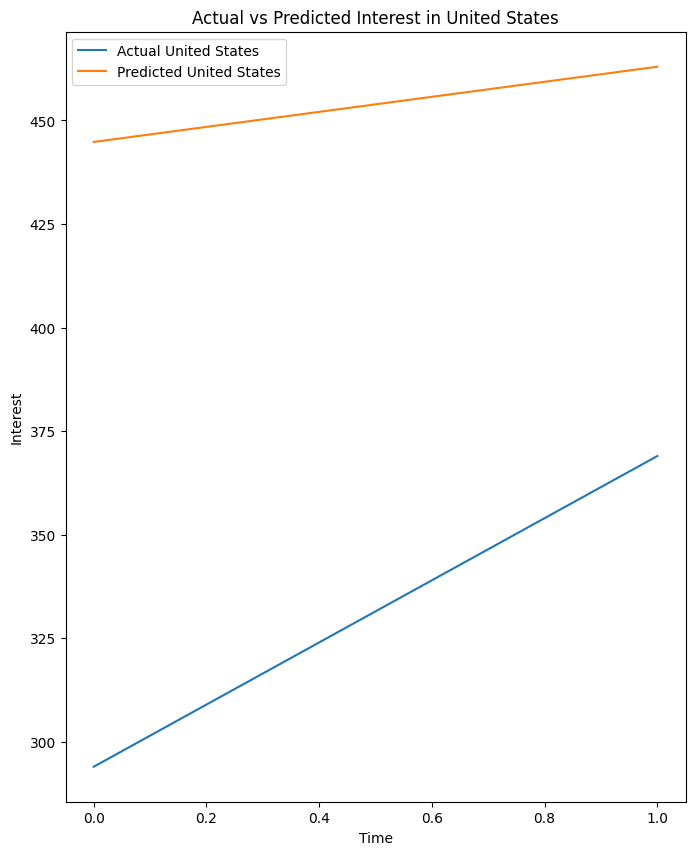

MSE for Cluster: 0.020109809052161864


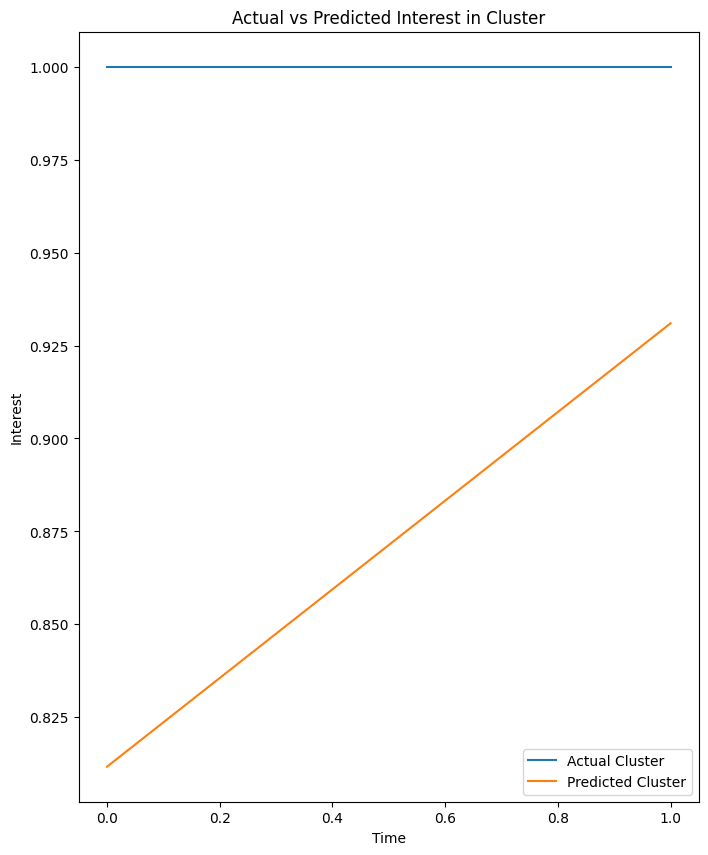

In [ ]:
mse_scores = {}

for i, col in enumerate(df.columns):
    mse = mean_squared_error(y_test_rescaled[:, i], y_pred_rescaled[:, i])
    mse_scores[col] = mse
    print(f'MSE for {col}: {mse}')

    plt.figure(figsize=(8, 10))
    plt.plot(y_test_rescaled[:, i], label=f'Actual {col}')
    plt.plot(y_pred_rescaled[:, i], label=f'Predicted {col}')
    plt.title(f'Actual vs Predicted Interest in {col}')
    plt.xlabel('Time')
    plt.ylabel('Interest')
    plt.legend()
    plt.show()